# **Changing bar contrast experiment**

In this experiment, the flies will be faced with closed-loop bars of changing contrast. The idea behind this is that changing the contrast of the bar will change the certainty of the landmark (lower contrast = lower certainty). I will image EPG neurons using the GMR-60D05 line, and GCaMP7f as an effector.

The stimulus is a 2 px blue bar of varying contrast on a black background. To create the stimulus, I made the code ' ' (2P computer). I used gs_val = 3, such that there are 8 different possible contrast levels (including darkness), and made the pattern have 8 y dimensions such that each dimension = a different contrast level. The resulting pattern is pattern #48. Using a powermeter (Newport power meter with sensor "818-UV" - selected wavelength = 470 nm) in the position where the fly will be, I measured the luminance levels for the different bars, and obtained the following:

In [1]:
import pandas as pd

luminance = {'pattern_dimension': [1, 2, 3, 4, 5, 6, 7, 8],
             'luminance_round_1': [0.290, 13.7, 27.15, 39.6, 53.5, 67.4, 81.2, 94],
             'luminance_round_2': [0.301, 13.6, 27.3, 40.4, 53.6, 65.1, 79, 93]}

luminance_data = pd.DataFrame(data=luminance)

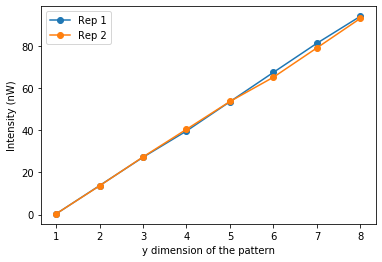

In [2]:
import matplotlib.pyplot as plt

plt.plot(luminance_data['pattern_dimension'],luminance_data['luminance_round_1'],'-o',label = 'Rep 1')
plt.plot(luminance_data['pattern_dimension'],luminance_data['luminance_round_2'],'-o',label = 'Rep 2')
plt.legend()
plt.xlabel('y dimension of the pattern')
plt.ylabel('Intensity (nW)');

During the experiment, each fly will receive every contrast, in a pseudo-random way. To go about this, I have created functions (using the code '' in the 2P computer), that makes the pattern change y dimensions every 60 sec (the function frequency needs to be set at 5 Hz in the 'run_trial.mat' code for this to hold true). I made 5 of these functions (#170-174). They all start with a darkness bout, and then randomly alternate between the different contrasts, including darkness once more at some point. The main goal of this is to compare the EPG bump's activity in darkness before the animal has had any visual experience vs after it's already had some (we believe that the bump might be relying more heavily on visual cues once it has already experienced them, such that it might deteriorate more in the darkness after it's had visual experienced compared to when it hasn't). Each fly will receive randomly one of the 5 functions. The experiment will run for 10 min. Next are images of the 5 different functions.

<img src="bar_contrast_tests/ToUse/Real/170.png" width="400">
<img src="bar_contrast_tests/ToUse/Real/171.png" width="400">
<img src="bar_contrast_tests/ToUse/Real/172.png" width="400">
<img src="bar_contrast_tests/ToUse/Real/173.png" width="400">
<img src="bar_contrast_tests/ToUse/Real/174.png" width="400">

I ran one fly under these conditions, but I saw later that the stim changes induced changes in DFF, so we will discart the data. I still think it is interesting to look at.

<img src="plots\general_figure.png" width="800">

The bump appears to deteriorate when the panels are off. If I look at the bump magnitude, and bump width at half max, the results make more sense when I average both halves of the PB without taking into account EPG connectivity than when I take it into account

### Incorrect PB combination
<img src="plots\incorrect_PB_combination.png" width="800">
<img src="plots\bump_mag_and_width.png" width="800">

### Correct PB combination
<img src="plots\correct_PB_combination.png" width="800">
<img src="plots\bump_mag_and_width_correct_PB_combination.png" width="800">

Before starting the experiments, I want to make sure that changes in GCaMP fluorescence reflect actual changes in neural activity and not a different amount of light going into the microscope for the different stimuli. To control for this, I imaged from a couple GCaMP negative flies (specifically, +;+;UAS-GCaMP7f, without the Gal4 lines) while presenting them with the stimulus. The animals don't have GCaMP, but there is some mild autofluorescence coming from some of the cuticle. Next is the data obtained for these flies:

<img src="Bleedthrough\data\no-GCaMP\20200707\20200707_+,+,GCaMP7f/dff_ydim.png" width="400">

There is a pretty clear change in fluorescence with the change in y dimension. Rachel pointed out that we should look at how much that change represents percentage wise compared with the actual fluorescence values. I am then looking at that next:

<img src="Z:\Wilson Lab\Mel\Experiments\Uncertainty\Exp25\Bleedthrough\data\no-GCaMP\20200707\20200707_+,+,GCaMP7f/f_ydim.png" width="600">

The percentage change is about 6-7%, which seems rather big. I need to look into PMT filters or other ways of preventing stimulus light to go into the objective.

After talking with Rachel, we have come up with an addition to the experiment. For each animal, I'm first going to run 900 sec of pattern #47 (an alternating darkness-high contrast bar-darkness) with function #175, which makes it present darkness for 5 min, high contrast bar for 5 min, and darkness for 5 min. This will help us more directly compare the darkness bouts pre and post experience, and help us get more data out of each fly.

I talked with Helen about the bleedthrough problem and she mentioned that she had similar issues during grad school and that this was actually not due to the PMT collecting green photons from the LED panels, but rather it was the blue photons in the LEDs making the fly fluoresce in green. She suggested getting some additional filters that would let some of the blue light through but have a peak shifted towards green to filter some of the bluer blue light. She said neutral density filters might help as well. I got some filters from ROSCOE, and I'm trying different combinations to test the noise.

On 07/24/2020, I tried a couple different filter and fly combinations to see if I still got the noise. I tried the following:

| Filters | Fly type | Ball on |
| --- | --- | --- |
| 3 blue + 1 bluer green | no fly | yes |
| 3 blue + 1 bluer green | no fly | no |
| 3 blue + 1 bluer green | 60D05_GFP | yes |
| 3 blue + 1 bluer green | 60D05_GFP | no |
| 3 blue + 1 bluer green | GCaMP7f_x (negative) | yes |
| 3 blue + 1 bluer green | GCaMP7f_x (negative) | no |
| 3 bluer green | GCaMP7f_x (negative) | yes |
| 3 bluer green | GCaMP7f_x (negative) | no |

I got the following results:

**(1)** The 3 layers of green filters by themselves clearly do not work. They might shield blue photons, but they're probably making it easier from green photons to reach the PMT, and you can clearly tell when the stimulus is changing. This is true both with (left) and without (right) the ball.

from IPython.display import HTML, display
<table><tr><td><img src='Bleedthrough\data\no-GCaMP\20200724_3bluerG_negativefly_ball/F_sid0.png'></td><td><img src='Bleedthrough\data\no-GCaMP\20200724_3bluerG_negativefly_ball/F_sid0.png'></td></tr></table>

**(2)** Adding 1 layer of green filter (ROSCO'S 'Marine blue #131 E-color') to the blue filters seems to have worked, since I can no longer distinguish when the stimulus is changing. Next is the negative fly, similar to that for which we detected the changes with the 3 green filters, or with the 3 blue filters alone. This is true both with (left) and without (right) the ball.

<table><tr><td><img src='Bleedthrough\data\no-GCaMP\20200724_3B+G_negativefly_ball/F_sid1.png'></td><td><img src='Bleedthrough\data\no-GCaMP\20200724_3B+G_negativefly_ball/F_sid2.png'></td></tr></table>

I also don't detect the stimulus change with these filters if I image without a fly on (with the holder with some transparent tape over the hole, and saline). This is true both with (left) and without (right) the ball.

<table><tr><td><img src='Bleedthrough\data\no-GCaMP\20200724_3B+G_nofly_ball/F_sid1.png'></td><td><img src='Bleedthrough\data\no-GCaMP\20200724_3B+G_nofly_ball/F_sid2.png'></td></tr></table>

**(3)** The results using GFP flies are really weird. I would have expected for the signal to remain rather constant throughout the trial, but it sometimes changes, and these changes are not related with the stimulus changes.

<img src="Bleedthrough\data\no-GCaMP\20200724_3B+G_GFPfly_ball/DFF_all_sessions.png" width="1200">

### Curtains closed, lights off

<img src="Bleedthrough\data\no-GCaMP\20200724_3B+G_GFPfly_ball/DFF_sid0_curtainsclosed_lightsoff.png" width="1200">

### Curtains closed, lights off

<img src="Bleedthrough\data\no-GCaMP\20200724_3B+G_GFPfly_ball/DFF_sid1_curtainsclosed_lightsoff.png" width="1200">

### Curtains open, lights off

<img src="Bleedthrough\data\no-GCaMP\20200724_3B+G_GFPfly_ball/DFF_sid2_curtainsopen_lightsoff.png" width="1200">

### Curtains open, lights on

<img src="Bleedthrough\data\no-GCaMP\20200724_3B+G_GFPfly_ball/DFF_sid3_curtainsopen_lightson.png" width="1200">

If I now look at an ROI without GFP:

<img src="Z:\Wilson Lab\Mel\Experiments\Uncertainty\Exp25\Bleedthrough\data\no-GCaMP\20200724_3B+G_GFPfly_ball/DFF_noGFP_ROI_all_sessions.png" width="1200">

I will then continue to use the 3 blue filters + extra layer greener filter. I am going to design the experiment such that the protocol will be:
1. 25 min of pattern #47 with function #181 (5 min darkness, 15 min bright bar in closed-loop, 5 min darkness)
2. 1200 sec of the bar contrast experiment, using pattern #50, and a function that randomly makes it change contrast every 200 sec, and makes it jump either -90 or 90 deg 100 sec into a given contrast. I will randomly select from 5 hard-coded functions (#182-186).
3. 600 sec of a bar contrast experiment using a horizontal dotted stim (pattern #52) instead of the vertical bar, with the stimulus changing contrast every 60 sec (function #187). The horizontal 'bar' has 1 dot for every 3 px, giving a total of 32 illuminated pixels, to match the intensity of the vertical bar.

**20200902**

__Update__: After having spent a couple weeks trying to run flies with poor PB expression, I have finally managed to get flies that walk well and have good expression.
I ran a couple of flies that did not show a stable offset in the first block during the period of the bar on, so I didn't think it made sense to interpret the results from the subsequent blocks either. An example of this is this fly (fly 1 from 20200828):

<img src="Z:\Wilson Lab\Mel\Experiments\Uncertainty\Exp25\data\Experimental\bad_flies\20200828_60D05_7f\analysis\plots/HeatmapAndOffset.png" width="1200">

Because of this, I put this fly, as well as any other who had issues either evident during acquisition of during analysis that made it such that the data shouldn't be analyzed, in a folder called 'bad flies'.

I have so far gotten an n=1 of a good fly, and the data has helped me realize a few things. Next are some of the results with comments.

***Trial 0 : darkness-blue bar-darkness block.***

<img src="Z:\Wilson Lab\Mel\Experiments\Uncertainty\Exp25\data\Experimental\20200828_60D05_7f_fly2\analysis\plots\sid0/HeatmapAndOffset.png" width="1200">

The jumps in this experiment are currently given by the python code (i.e., I'm seeting the trial as a 'menotaxis' trials, and the python code is making the bar jump every 90 sec from the start, using a pre-allocated vector of -90 and 90 stored in that code). The nice thing about doing it this way is that I don't have to correct the heading data to account for the jumps. The bad thing about doing it this way is that it is hard to know the exact location of the jumps, since they are usually a few sec offset. I think that moving forward I will create a new pattern for this experiment that embeds the 90 and -90 jumps into the pattern's y dimensions, and then use a ypos function to move it. A second thing to consider is to check whether the panels are making the bar 'flash' for a bruef period before setting the mode to 'darkness'. This might be the case if dimension 1 = blue bar and they start reading the stim as pos1 = 1,1, and then the function starts and moves the pattern to dimension 2.

***Trial 1: changing bar contrast block***

<img src="Z:\Wilson Lab\Mel\Experiments\Uncertainty\Exp25\data\Experimental\20200828_60D05_7f_fly2\analysis\plots\sid1/HeatmapAndOffset.png" width="1200">

This fly maintained the offset beautifully :). There is one problem with this block the way it is currently coded. It appears that the each of the y dimensions in the pos function where added 1. The resulting function makes the bar jump by 90, -90 or 180, depending on the function number, in a very unbalanced way. I should probably make new functions, or modify the startpos of the panels to ensure that the y dimensions won't get 1 added to them.

<img src="Z:\Wilson Lab\Mel\Experiments\Uncertainty\Exp25\data\Experimental\20200828_60D05_7f_fly2\analysis\plots\sid1/VonMisesBumpOrdered.png" width="600">

Looking at the bump magnitude and width at half max, it doesn't seem like they are scaling with the contrast, but rather like they are changing with the time of the experiment. This might be because the fly started walking less and less, something that also affects bump magnitude. Rachel suggested looking at linear models to model the bump magnitude (or other parameters) with multiple variables (fly's walking statistics, bar contrast, experiment time, ...).

***Trial 2: luminance control***

<img src="Z:\Wilson Lab\Mel\Experiments\Uncertainty\Exp25\data\Experimental\20200828_60D05_7f_fly2\analysis\plots\sid2/HeatmapAndOffset.png" width="1200">

For this control, the stimulus is changing contrasts every 60 sec, and I ran it 600 sec, resulting in some intensities being depicted twice. I chose to take only the first 6 contrast levels in this case. Moving forward, I think that to make the comparison more homogeneous between this and the previous block, I will make the function change contrast every 100 sec, and run the block for 600 sec.

To recap, I will:
1. Make a new pattern for the block 1 such that it (a) doesn't flash the bar when it starts and (b) the jumps are embedded into the pattern and ypos function.
2. Make new functions for the block 2 or check the starpos settings of the panels such that the jumps are all of the same magnitude (maybe 120 and -120, as suggested by Anna?), and well balanced.
3. Make a new function for block 3 that makes the pattern change every 100 sec instead of every 60.

I have made the changes and the new protocol will be:
1. 1500 sec of pattern #54 with function #194. This is 300 sec of darkness, 900 sec of a blue bar in closed-loop with 90 and -90 deg jumps every 100 sec in the following order 90,90,90,-90,-90,90,-90,-90 and 300 sec darkness.
2. 1200 sec of pattern #50 with functions #190-193. This is the bar contrast experiment, with each contrast lasting 200 sec and the bar jumping in the middle. The jump orders are the following:
* #190: -90,90,-90,-90,90,90
* #191: -90,90,90,90,-90,-90
* #192: 90,90,90,-90,-90,-90
* #193: -90,90,-90,-90,90,90<br>
The contrast orders are the following:
* #190: 5,1,4,6,3,2
* #191: 5,4,2,6,1,3
* #192: 1,5,4,2,6,3
* #193: 3,1,5,4,2,6
3. 600 sec of pattern #52 with function #189. This is the horizontal dots stim, where the contrast changes every 100 sec.<br>
The contrast order is: 3,6,2,4,5,1

**20200911**
I have n = 3 flies of the previous experiment, and it is pretty clear that flies are able to see even the lowest contrast, since the offset is narrow and stable even for that contrast. Next is an example in one of the flies.

<img src="Z:\Wilson Lab\Mel\Experiments\Uncertainty\Exp25\data\Experimental\20200904_60D05_7f\analysis\plots\sid1/HeatmapAndOffset.png" width="1200">

I am then dimming the stimuli more. I have added two layers of neutral density gel filters (#209 from ROSCO, 0.3 ND, 51% transmission), and will repeat the experiment under these new conditions.